In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

from regression.feature_extraction import FeatureExtractor, LabelLoader
from regression.model import Regressor
import os
import pickle
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
%cd /Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception

/Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception


In [3]:
image_dir = "data/maxdistinct"
test_dir = "data/random"
label = "Trustworthy"

In [4]:
# get face embeddings for all the training data
features_train = FeatureExtractor(image_dir).get_features()
features_train

,Face name,Source,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,ID13_Trustworthiness (300 faces)_+300,25MaxDistinct_Trustworthy-FineGrain,-1.174784,-0.941566,-0.884329,0.548766,2.046613,-0.396934,0.688382,-0.394899,...,0.874173,2.431870,-1.016981,-0.657062,2.355668,-1.262387,-1.398359,0.721940,0.538926,0.161392
1,ID2_Trustworthiness (300 faces)_-225,25MaxDistinct_Trustworthy-FineGrain,-0.760669,0.775413,-1.025145,-0.635267,1.649607,-1.190063,0.364011,-0.384965,...,0.791571,2.746113,0.867498,-0.621778,1.286932,-1.524056,-0.496940,-0.989719,-0.938413,-1.734283
2,ID21_Trustworthiness (300 faces)_+050,25MaxDistinct_Trustworthy-FineGrain,-0.830896,1.214826,-1.075328,-0.675492,0.852515,-0.880181,0.819441,-0.124339,...,0.256124,2.498894,0.354509,-0.884457,0.576560,-1.094290,-1.588486,0.759328,-0.373337,0.194816
3,ID9_Trustworthiness (300 faces)_+225,25MaxDistinct_Trustworthy-FineGrain,-1.253792,-0.372510,-0.538456,0.415710,2.711879,-0.899931,1.131233,-0.643618,...,0.860649,2.747258,-0.854895,-0.272229,1.558391,-0.581030,-1.470094,-0.074341,-0.259531,-0.137965
4,ID5_Trustworthiness (300 faces)_+250,25MaxDistinct_Trustworthy-FineGrain,-1.353796,0.693900,-1.837278,-0.913003,2.396292,-1.324149,0.921844,-0.120712,...,0.974574,2.604771,0.546454,1.000151,1.025681,-1.208272,-1.164701,-0.728019,-0.779299,-0.212659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,ID25_Extroverted (300 faces)_+250,25MaxDistinct_Extroversion-FineGrain,-1.073504,1.758979,-0.661875,-0.313715,1.121512,-0.881010,1.702249,-0.907274,...,1.364669,2.506264,0.969568,-0.527549,0.879178,-1.778235,-0.757953,0.012727,0.187866,-1.527311
3746,ID21_Extroverted (300 faces)_+050,25MaxDistinct_Extroversion-FineGrain,-0.584089,1.505130,-1.261803,-0.419505,0.630759,-1.063184,0.687727,-0.308358,...,0.309022,2.460514,0.427823,-0.591949,0.247225,-1.259413,-1.449152,0.737994,-0.314356,-0.044914
3747,ID17_Extroverted (300 faces)_-300,25MaxDistinct_Extroversion-FineGrain,-1.250208,-0.035288,-0.880391,0.108769,1.737805,-0.333050,-0.109195,0.241246,...,1.277622,2.706331,0.478851,-0.550229,1.257995,-1.433815,-0.907266,-0.227266,0.041670,-0.182004
3748,ID2_Extroverted (300 faces)_+175,25MaxDistinct_Extroversion-FineGrain,-0.843561,0.434765,-0.851515,-0.913086,1.740956,-1.086630,0.506521,-0.529055,...,0.766366,2.369766,0.766422,-0.139423,1.338382,-1.372215,-0.105426,-1.019303,-0.993037,-1.378526


In [5]:
labels = LabelLoader(image_dir).get_labels()
labels

,Face name,Trustworthy,Dominant,Competent,Likeable,Attractive,Extroverted
0,ID13_Trustworthiness (300 faces)_+300,300.0,NaN,NaN,NaN,NaN,NaN
1,ID2_Trustworthiness (300 faces)_-225,-225.0,NaN,NaN,NaN,NaN,NaN
2,ID21_Trustworthiness (300 faces)_+050,50.0,NaN,NaN,NaN,NaN,NaN
3,ID9_Trustworthiness (300 faces)_+225,225.0,NaN,NaN,NaN,NaN,NaN
4,ID5_Trustworthiness (300 faces)_+250,250.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3745,ID25_Extroverted (300 faces)_+250,NaN,NaN,NaN,NaN,NaN,250.0
3746,ID21_Extroverted (300 faces)_+050,NaN,NaN,NaN,NaN,NaN,50.0
3747,ID17_Extroverted (300 faces)_-300,NaN,NaN,NaN,NaN,NaN,-300.0
3748,ID2_Extroverted (300 faces)_+175,NaN,NaN,NaN,NaN,NaN,175.0


## Embedding Importance

First task: which features in the embedding are most influential for a) regression and b) classification?

In [6]:
from regression.api import get_regressor
reg = get_regressor(label, image_dir)
reg

Generating Trustworthy regressor


In [7]:
from regression.api import merge_x_y

df = merge_x_y(features_train, labels)
reg = Regressor(df, label)
reg.fit(split=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

What do the regression feature importances look like?
> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [8]:
reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
reg_imp

,0
10,0.526347
47,0.149762
27,0.082943
12,0.021598
111,0.018317
...,...
122,0.000310
49,0.000299
120,0.000252
54,0.000250


Is it the same for classification?

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import copy

def binarize(y, threshold=0):
    return (y > threshold).astype(int)

def interpret_binary(y):
    return "Positive" if y else "Negative"

# clf = RandomForestClassifier(n_estimators=100)
# also tried KNN - no difference
# clf = KNeighborsClassifier(n_neighbors=5)
clf = LogisticRegression(max_iter=1000)
X = reg.X
y = reg.y
# convert y to binary
y = binarize(y)
clf.fit(X, y)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_score(clf, X, y, cv=kf).mean()

0.9486943164362518

Out-of-sample accuracy?
(Trying without normalization in case that's causing a problem - turns out, no difference.)

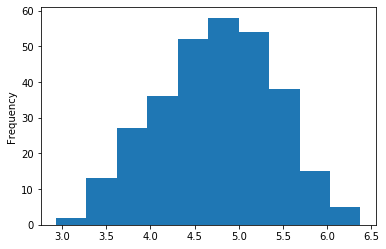

In [10]:
features_test = FeatureExtractor(test_dir).get_features()
labels_test = LabelLoader(test_dir).get_labels(normalization=False).dropna()
labels_test["Trustworthy"].plot.hist()

In [11]:
X_test = Regressor.make_X(features_test)
y_test = binarize(labels_test[label], threshold=labels_test[label].mean())

In [12]:
clf.score(X_test, y_test)

0.49666666666666665

In [13]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.43666666666666665

Feature importance?

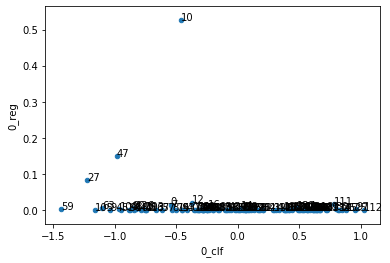

In [14]:
import matplotlib.pyplot as plt

# for random forest
# clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
# for coefs
clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
fig, ax = plt.subplots()
imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
for k, v in imps.iterrows():
    ax.annotate(k, v)

Observation: the same two embeddings are the most important (10 and 47). Is this true for other labels?

Answer: barely. Not sure that these importances are significant - how can we trace them back to the original images, given that they're embeddings?

Attractive


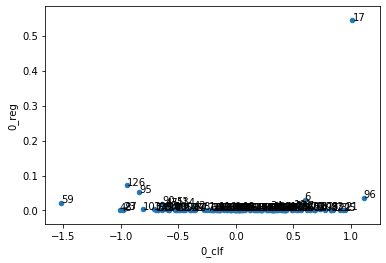

Competent


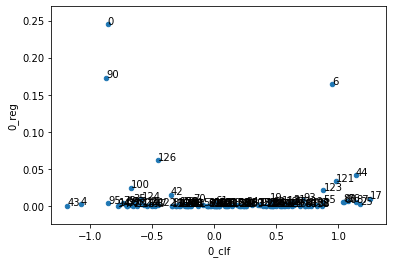

Dominant


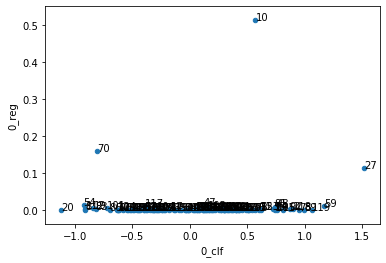

Extroverted


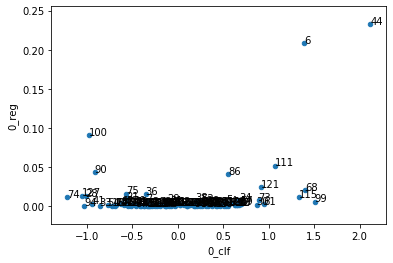

Likeable


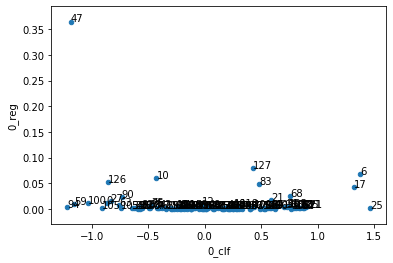

Trustworthy


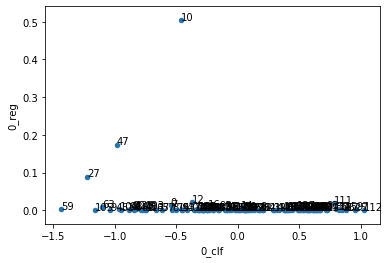

In [15]:
def feature_importance(label):
    reg = Regressor(df, label)
    reg.fit(split=False)
    reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
#     clf = RandomForestClassifier(n_estimators=100)
    clf = LogisticRegression(max_iter=1000)
    X = reg.X
    y = reg.y
    # convert y to binary
    y = (y > 0).astype(int)
    clf.fit(X, y)
    # for random forest
    # clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
    # for coefs
    clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
    imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
    print(label)
    fig, ax = plt.subplots()
    imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
    for k, v in imps.iterrows():
        ax.annotate(k, v)
    plt.show()
#     return reg_imp, clf_imp
feature_importance("Attractive")
feature_importance("Competent")
feature_importance("Dominant")
feature_importance("Extroverted")
feature_importance("Likeable")
feature_importance("Trustworthy")

### Perturbations

For this section, using an SVC model (best suited, and no need for interpretability like in last section).

In [178]:
from keras.preprocessing import image
from regression.feature_extraction import FaceNetExtractionModel
from sklearn.svm import SVC

extraction_model = FaceNetExtractionModel()
clf = SVC(kernel='linear', probability=True)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=kf).mean()

0.95189452124936

In [215]:
# a sample image
def get_img(name, source, d):
    img_path = "data/{}/{}/{}.jpg".format(d, source, name)
    return image.load_img(img_path, target_size=extraction_model.target_size)
sample = features_train.sample()
sample_img = get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

(1, 128)


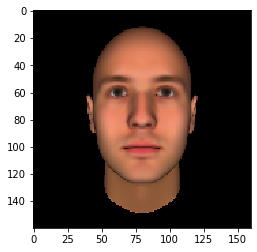

In [180]:
# a sample extraction
from keras.applications.inception_v3 import preprocess_input

img_processed = preprocess_input(image.img_to_array(sample_img)).astype(float)
plt.imshow(img_processed / 2 + 0.5)

# need to load up face net
sample_embedding = extraction_model.model.predict(np.array([img_processed]))
print(sample_embedding.shape)

In [181]:
# a sample classification
def predict_fn(img_arrays):
    embeddings = extraction_model.model.predict(img_arrays)
    preds = clf.predict_proba(embeddings)
    return preds
pred = predict_fn(np.array([img_processed]))
pred

array([[0.02096423, 0.97903577]])

In [205]:
# from https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html
from lime import lime_image
from skimage.segmentation import mark_boundaries

def explain_img(img, name="", ground_truth=None):
    img_processed = preprocess_input(image.img_to_array(img)).astype(float)
    sample_embedding = extraction_model.model.predict(np.array([img_processed]))
    pred = predict_fn(np.array([img_processed]))
    
    explainer = lime_image.LimeImageExplainer()
    print("Image {} w/ ground truth val {}".format(name, ground_truth))
    print("Explaining label {} for attribute {}".format(interpret_binary(np.argmax(pred)), label))
    explanation = explainer.explain_instance(
        img_processed, 
        predict_fn, 
        hide_color=0, 
        num_samples=3000,
        num_features=300000
    )
    temp, mask = explanation.get_image_and_mask(
        np.argmax(pred), 
        positive_only=True, 
        num_features=3, 
        hide_rest=True
    )
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_processed / 2 + 0.5)
    ax[1].imshow(mark_boundaries(temp / 2 + 0.5, mask))

    return explanation

Image  w/ ground truth val None
Explaining label Negative for attribute Trustworthy


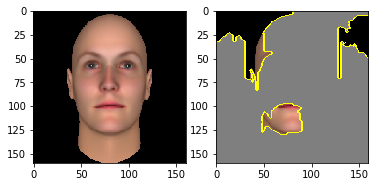

In [206]:
explain_img(sample_img)

Now let's try with a variety of images.

Image ID24_Trustworthiness (300 faces)_+175 w/ ground truth val 175.0
Explaining label Positive for attribute Trustworthy



Image ID18_Trustworthiness (300 faces)_-125 w/ ground truth val -125.0
Explaining label Negative for attribute Trustworthy



Image ID14_Trustworthiness (300 faces)_-250 w/ ground truth val -250.0
Explaining label Negative for attribute Trustworthy



Image ID16_Trustworthiness (300 faces)_+025 w/ ground truth val 25.0
Explaining label Positive for attribute Trustworthy



Image ID12_Trustworthiness (300 faces)_+300 w/ ground truth val 300.0
Explaining label Positive for attribute Trustworthy


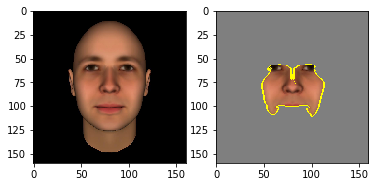

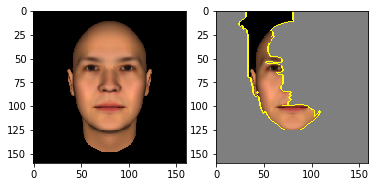

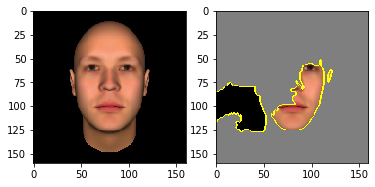

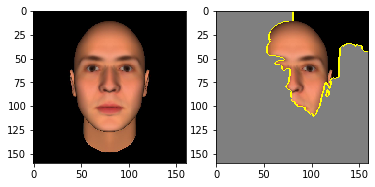

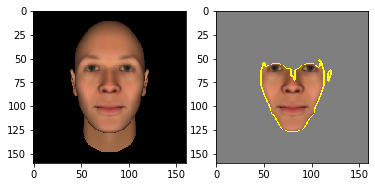

In [228]:
# Several more Max Distinct samples:
for i in range(5):
    sample = df[df[label].notna()].sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct")
    explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])

Image f42887_e_170 w/ ground truth val 3.448275862
Explaining label Positive for attribute Trustworthy



Image f42887_e_119 w/ ground truth val 4.310344828
Explaining label Negative for attribute Trustworthy



Image f42887_e_105 w/ ground truth val 5.2758620689999995
Explaining label Negative for attribute Trustworthy



Image f42887_e_003 w/ ground truth val 4.24137931
Explaining label Negative for attribute Trustworthy



Image f42887_e_187 w/ ground truth val 4.448275862
Explaining label Negative for attribute Trustworthy


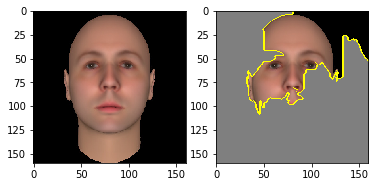

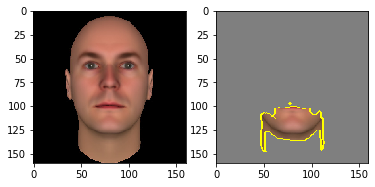

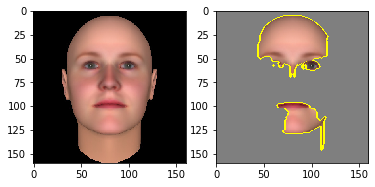

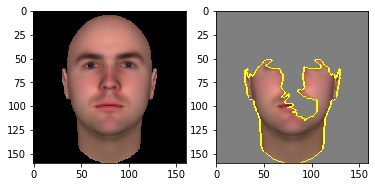

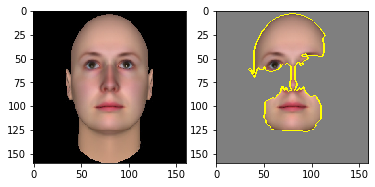

In [229]:
# Several Random samples:
df_test = merge_x_y(features_test, labels_test)
for i in range(5):
    sample = df_test[df_test[label].notna()].sample()
    sample_img = get_img(*sample[['Face name', 'Source']].values[0], "random")
    explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])